### Proof-of-Concept for extracting street networks from OpenStreetMap and utilising them in VRP analysis

In [2]:
import geopandas as gpd
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import osmnx as ox
from vrpy import VehicleRoutingProblem

B -> Polygon boundaries of the Würzburg city area (OSM Relation ID "R62464")  
G -> MultiDiGraph of the street network with boundaries B extracted from OSM 

In [3]:
B = ox.geocode_to_gdf("R62464", by_osmid=True)
G = ox.graph_from_polygon(
    B.unary_union,
    custom_filter='["highway"~"motorway|trunk|primary|secondary|tertiary|residential|primary_link|secondary_link|tertiary_link|living_street|road|service|pedestrian"]'
    )

#calculate additional data useful for more realistic VRP analysis
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

Test whether our Graph actually contains the Würzburg street network

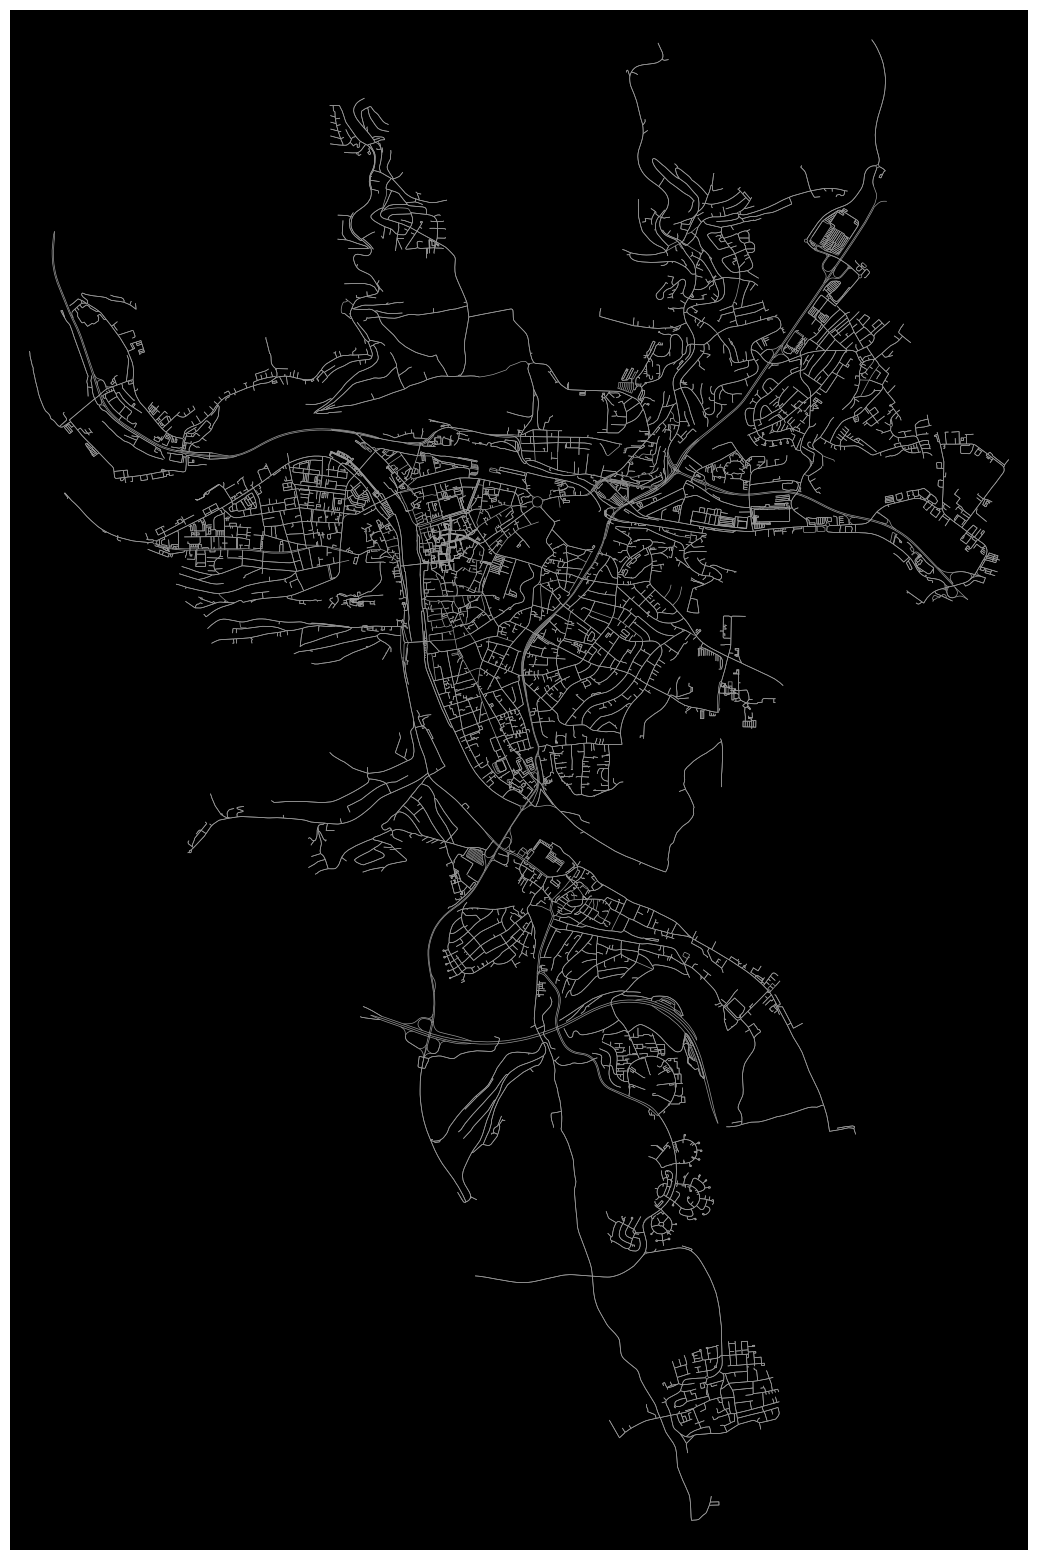

(<Figure size 2000x2000 with 1 Axes>, <AxesSubplot: >)

In [5]:
ox.plot_graph(
    G,
    figsize=(20, 20),
    bgcolor="#000000",
    node_size=0,
    edge_linewidth=0.5
)

Since that seems to be the case, start analyzing 

In [4]:
G.nodes()

NodeView((580993, 10799058, 10799066, 10799083, 10799085, 10799087, 10799089, 10799100, 10799937, 10799942, 10799945, 10799947, 10799953, 18177993, 18177997, 18178003, 18178011, 18178013, 18178014, 18178020, 21180073, 21180077, 21263489, 21263521, 21263525, 21263574, 21263657, 21263658, 21263667, 21263687, 21263695, 21263716, 21263718, 21263726, 21263784, 21263785, 21263795, 21263797, 21263799, 21273701, 21273711, 21273715, 21273717, 21273726, 21273729, 21273732, 21273747, 21273753, 21273763, 21276514, 21276520, 21276528, 21276535, 21286327, 21286348, 21286352, 21286354, 21286375, 21286381, 21286405, 21286441, 21286462, 21287764, 21287776, 21287780, 21287802, 21287805, 21287811, 21287814, 21287822, 21287824, 21287826, 21287865, 21287873, 21287874, 21287893, 21287961, 21287991, 21288019, 21288021, 21288031, 21288060, 21288066, 21288084, 21288102, 21288119, 21288186, 21288187, 25584345, 25584351, 25584354, 25584357, 25584361, 25584362, 25588713, 25588723, 25588724, 25588730, 25588731, 25